# **MNIST_Digit_Recognition**

## **Introduction:**
 This notebook demonstrates digit recognition using Convolutional Neural Networks on the MNIST dataset.

#**Dataset**
We use the MNIST Digit Recognition Dataset, to correctly identify digits from a dataset of tens of thousands of handwritten images - [Dataset Link](https://www.kaggle.com/competitions/digit-recognizer/data)

#**Importing Necessary Libraries and Datset**

In [1]:
import random
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


#**Data Exploration**

In [3]:
len(X_train), len(X_test)

(60000, 10000)

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

(28, 28)


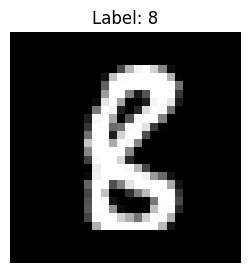

In [5]:
# View Random Images and their labels from the Dataset

def view_random_image(data):
  X, y = data
  n = random.randint(0, len(X))
  print(X[n].shape)
  plt.figure(figsize=(3,3))
  plt.imshow(X[n], cmap="gray")
  plt.title(f"Label: {y[n]}")
  plt.axis('off')

view_random_image((X_train, y_train))

In [6]:
X_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [7]:
# Change the datatype of train and test data to float32, and normalizing the data

X_train, X_test = X_train.astype('float32'), X_test.astype('float32')
X_train, X_test = X_train/255. , X_test/255.

In [8]:
# Check data distribution to check for data imbalance
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [9]:
# The data seems to be fairly balanced.

In [10]:
y_train.shape

(60000,)

#**Deep Learning - Model Creation**

##**CNN - 1**

In [11]:
# Callbacks for the Deep Learning Model

from tensorflow.keras.callbacks import ModelCheckpoint

# Callback to save the Keras model or model weights at some frequency.
model_check_point = ModelCheckpoint(monitor='val_accuracy',filepath='/content/sample_data/MNIST.h5',save_best_only=True,verbose=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [39]:
# Simple CNN Classification Model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as L

model_1 = Sequential()
model_1.add(L.Conv2D(16, 3, input_shape = (28, 28, 1), activation="relu"))
model_1.add(L.Conv2D(16, 3, activation="relu"))
model_1.add(L.Dropout(0.2))
model_1.add(L.Conv2D(32, 3, activation="relu"))
model_1.add(L.Conv2D(32, 3, activation="relu"))
model_1.add(L.Dropout(0.2))
model_1.add(L.Conv2D(64, 3, activation="relu"))
model_1.add(L.Flatten())
model_1.add(L.Dense(64, activation="relu"))
model_1.add(L.Dense(10, activation="softmax"))

model_1.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=["accuracy"])

history_1 = model_1.fit(X_train, y_train, epochs=20, batch_size=32,
                        validation_data=(X_test,y_test),
                        callbacks=[model_check_point, early_stopping])

Epoch 1/20
1874/1875 [============================>.] - ETA: 0s - loss: 0.1287 - accuracy: 0.9607
Epoch 1: val_accuracy did not improve from 0.99110
1875/1875 [==============================] - 16s 6ms/step - loss: 0.1286 - accuracy: 0.9607 - val_loss: 0.0535 - val_accuracy: 0.9830
Epoch 2/20
1869/1875 [============================>.] - ETA: 0s - loss: 0.0465 - accuracy: 0.9860
Epoch 2: val_accuracy did not improve from 0.99110
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0465 - accuracy: 0.9860 - val_loss: 0.0395 - val_accuracy: 0.9874
Epoch 3/20
1873/1875 [============================>.] - ETA: 0s - loss: 0.0324 - accuracy: 0.9900
Epoch 3: val_accuracy did not improve from 0.99110
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0324 - accuracy: 0.9900 - val_loss: 0.0314 - val_accuracy: 0.9893
Epoch 4/20
1869/1875 [============================>.] - ETA: 0s - loss: 0.0238 - accuracy: 0.9927
Epoch 4: val_accuracy did not improve from 0.99110
18

In [16]:
#y_preds = model_1.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [18]:
y_preds = np.argmax(y_preds, axis=1)
y_preds

array([7, 2, 1, ..., 4, 5, 6])

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Accuracy: {accuracy_score(y_preds, y_test)}")
print(f"Precision: {precision_score(y_preds, y_test, average='macro')}")
print(f"Recall: {recall_score(y_preds, y_test, average='macro')}")
print(f"F1 Score: {f1_score(y_preds, y_test, average='macro')}")

Accuracy: 0.9888
Precision: 0.9886892622863541
Recall: 0.9888187064341833
F1 Score: 0.9887304811719758


###Great! The above results are Amazing!

#**Viewing some Predictions**

In [36]:
def view_preds(model, data):
  X, y = data
  n1, n2, n3 = random.randint(0, len(X)), random.randint(0, len(X)), random.randint(0, len(X))
  img1, img2, img3 = X[n1], X[n2], X[n3]
  pred1, pred2, pred3 = model.predict(np.expand_dims(img1, axis=0)), model.predict(np.expand_dims(img2, axis=0)), model.predict(np.expand_dims(img3, axis=0))
  pred1, pred2, pred3 = np.argmax(pred1, axis=1), np.argmax(pred2, axis=1), np.argmax(pred3, axis=1)

  plt.figure(figsize=(6,6))
  # Create a figure with six subplots
  fig, axs = plt.subplots(3, 2)

  # Plot the first image on the left subplot
  axs[0][0].imshow(img1, cmap="gray")
  axs[0][0].axis("off")
  axs[0][0].set_title(f"Original Label - {y[n1]}")

  # Plot the second image on the right subplot
  axs[0][1].imshow(img1, cmap="gray")
  axs[0][1].axis("off")
  axs[0][1].set_title(f"Predicted Label - {pred1[0]}")

  # Plot the first image on the left subplot
  axs[1][0].imshow(img2, cmap="gray")
  axs[1][0].axis("off")
  axs[1][0].set_title(f"Original Label - {y[n2]}")

  # Plot the second image on the right subplot
  axs[1][1].imshow(img2, cmap="gray")
  axs[1][1].axis("off")
  axs[1][1].set_title(f"Predicted Label - {pred2[0]}")

  # Plot the first image on the left subplot
  axs[2][0].imshow(img3, cmap="gray")
  axs[2][0].axis("off")
  axs[2][0].set_title(f"Original Label - {y[n3]}")

  # Plot the second image on the right subplot
  axs[2][1].imshow(img3, cmap="gray")
  axs[2][1].axis("off")
  axs[2][1].set_title(f"Predicted Label - {pred3[0]}")

  # Show the plot
  plt.show()

1/1 [==============================] - 0s 19ms/step


<Figure size 600x600 with 0 Axes>

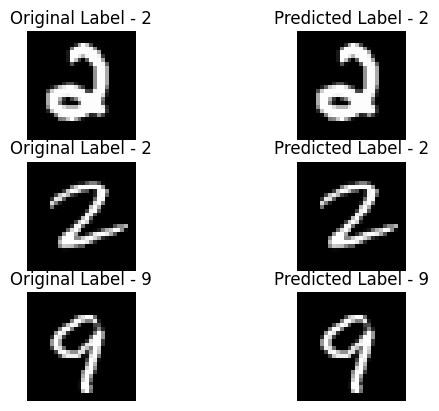

In [38]:
view_preds(model_1, (X_test, y_test))

###**Conclusion:** In this project, we achieved outstanding results in digit recognition using machine learning models on the MNIST dataset. Our model achieved an accuracy of 98.88%, demonstrating its effectiveness in accurately classifying handwritten digits. The precision, recall, and F1 score metrics also show a high level of model performance, making it a reliable tool for digit recognition tasks. This project highlights the power of machine learning in solving complex image classification problems.